<a href="https://colab.research.google.com/github/bobrowskijan/UEP/blob/main/PUM4_18_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

zaczytanie niezbędnych bibliotek

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.preprocessing import StandardScaler

zaczytaj dane dotyczace sprzedazy

In [14]:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Salary Data.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "rkiattisak/salaly-prediction-for-beginer",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

<ipython-input-14-72cc2aa30810>:9: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


First 5 records:     Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


preprocessing

1.   sprawdż typy danych
2.   zmien etykiedy na zmienne liczbowe
3. w przypadku brakujacych danych uzupelnij (w przypadku etykiet) najczesciej wystepującą wartością lub średnią wartością



In [15]:
# 1. Sprawdź typy danych
print(df.dtypes)

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object


In [16]:
from sklearn.preprocessing import LabelEncoder

col_to_change = ['Gender', 'Education Level', 'Job Title']
for col in col_to_change:
    if df[col].dtype == 'object':  # Check if the column is of object type
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

print(df['Gender'].head())


0    1
1    0
2    1
3    0
4    1
Name: Gender, dtype: int64


In [17]:
print(df.dtypes)

Age                    float64
Gender                   int64
Education Level          int64
Job Title                int64
Years of Experience    float64
Salary                 float64
dtype: object


In [18]:
# 3. W przypadku brakujących danych uzupełnij:
# a) W przypadku etykiet (zmiennych kategorialnych) najczęstszą wartością
for column in df.columns:
  if df[column].dtype == object:  # Sprawdź, czy kolumna zawiera dane kategorialne
    df[column].fillna(df[column].mode()[0], inplace=True)

# b) W przypadku zmiennych numerycznych średnią wartością
for column in df.columns:
  if pd.api.types.is_numeric_dtype(df[column]):  # Sprawdź, czy kolumna zawiera dane numeryczne
    df[column].fillna(df[column].mean(), inplace=True)

# Wyświetl zaktualizowane dane
print("Zaktualizowane dane:")
print(df.head())


Zaktualizowane dane:
    Age  Gender  Education Level  Job Title  Years of Experience    Salary
0  32.0       1                0        159                  5.0   90000.0
1  28.0       0                1         17                  3.0   65000.0
2  45.0       1                2        130                 15.0  150000.0
3  36.0       0                0        101                  7.0   60000.0
4  52.0       1                1         22                 20.0  200000.0


<ipython-input-18-c725508eb0f6>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [19]:
# Sprawdzenie sumy wartości null w każdej kolumnie
print(df.isnull().sum())

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


Podziel zbiór danych na testowy i treningowy w stosunku 30/70

In [25]:
X = df.drop('Salary', axis=1)  # Wszystkie kolumny oprócz 'Salary' to zmienne X
y = df['Salary']  # Kolumna 'Salary' to zmienna y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.head())



      Age  Gender  Education Level  Job Title  Years of Experience
19   51.0       1                0        102                 22.0
324  29.0       0                0         62                  2.0
79   30.0       0                0          9                  3.0
168  31.0       0                0         60                  4.0
18   25.0       0                0         18                  0.0


Stworz model regresji liniowej korzystajac z parametrów domyślnych
Przykład dokumentacji: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

In [33]:
# Stwórz model regresji liniowej z parametrami domyślnymi
model = LinearRegression()

# Dopasuj model do danych treningowych
model.fit(X_train, y_train)

# Dokonaj predykcji na danych testowych
y_pred = model.predict(X_test)

# Wyświetl współczynniki modelu
print("Współczynniki modelu:", model.coef_)
print("Wyraz wolny:", model.intercept_)

# Oblicz metryki oceny modelu
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)
print("EVS:", evs)


Współczynniki modelu: [ 2470.09993111  9597.35129158  1723.63966596 39354.04322114]
Wyraz wolny: 101034.07383910115
MSE: 246720425.82928088
MAE: 11041.52922768177
R^2: 0.8843173874193463
EVS: 0.8848690897704473


ocen model na zbiorze testowym za pomocą miar: średni błąd kwadratowy, średni błąd absolutny, wynik wyjaśnionej wariancji

In [34]:
# Oblicz metryki oceny modelu
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)
print("EVS:", evs)


MSE: 246720425.82928088
MAE: 11041.52922768177
R^2: 0.8843173874193463
EVS: 0.8848690897704473


spróbuj poprawić model, zacznij od danych, sprawdz korelacje, znormalizuj

Macierz korelacji:
                          Age    Gender  Education Level  Job Title  \
Age                  1.000000 -0.019865         0.546020   0.116616   
Gender              -0.019865  1.000000         0.008677   0.041562   
Education Level      0.546020  0.008677         1.000000   0.127791   
Job Title            0.116616  0.041562         0.127791   1.000000   
Years of Experience  0.979128  0.002818         0.573355   0.099299   
Salary               0.922335  0.069498         0.650507   0.135033   

                     Years of Experience    Salary  
Age                             0.979128  0.922335  
Gender                          0.002818  0.069498  
Education Level                 0.573355  0.650507  
Job Title                       0.099299  0.135033  
Years of Experience             1.000000  0.930338  
Salary                          0.930338  1.000000  


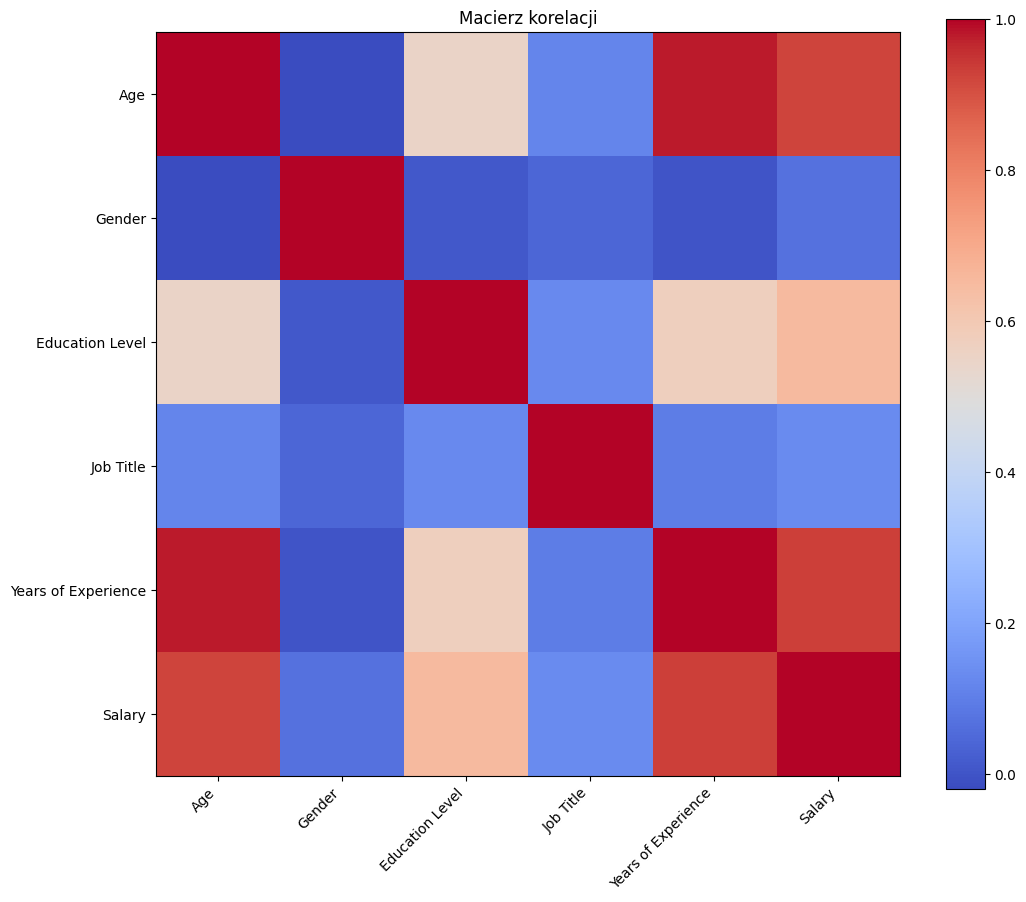

In [35]:
# Sprawdzenie korelacji między zmiennymi
correlation_matrix = df.corr()
print("Macierz korelacji:")
print(correlation_matrix)

# Wizualizacja korelacji (heatmap)
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(df.columns)), df.columns, rotation=45, ha='right')
plt.yticks(range(len(df.columns)), df.columns)
plt.title('Macierz korelacji')
plt.show()

Współczynniki modelu: [ 2470.09993111  9597.35129158  1723.63966596 39354.04322114]
Wyraz wolny: 101034.07383910115
MSE: 246720425.82928088
MAE: 11041.52922768177
R^2: 0.8843173874193463
EVS: 0.8848690897704473
Macierz korelacji:
                       Gender  Education Level  Job Title  \
Gender               1.000000         0.008677   0.041562   
Education Level      0.008677         1.000000   0.127791   
Job Title            0.041562         0.127791   1.000000   
Years of Experience  0.002818         0.573355   0.099299   
Salary               0.069498         0.650507   0.135033   

                     Years of Experience    Salary  
Gender                          0.002818  0.069498  
Education Level                 0.573355  0.650507  
Job Title                       0.099299  0.135033  
Years of Experience             1.000000  0.930338  
Salary                          0.930338  1.000000  


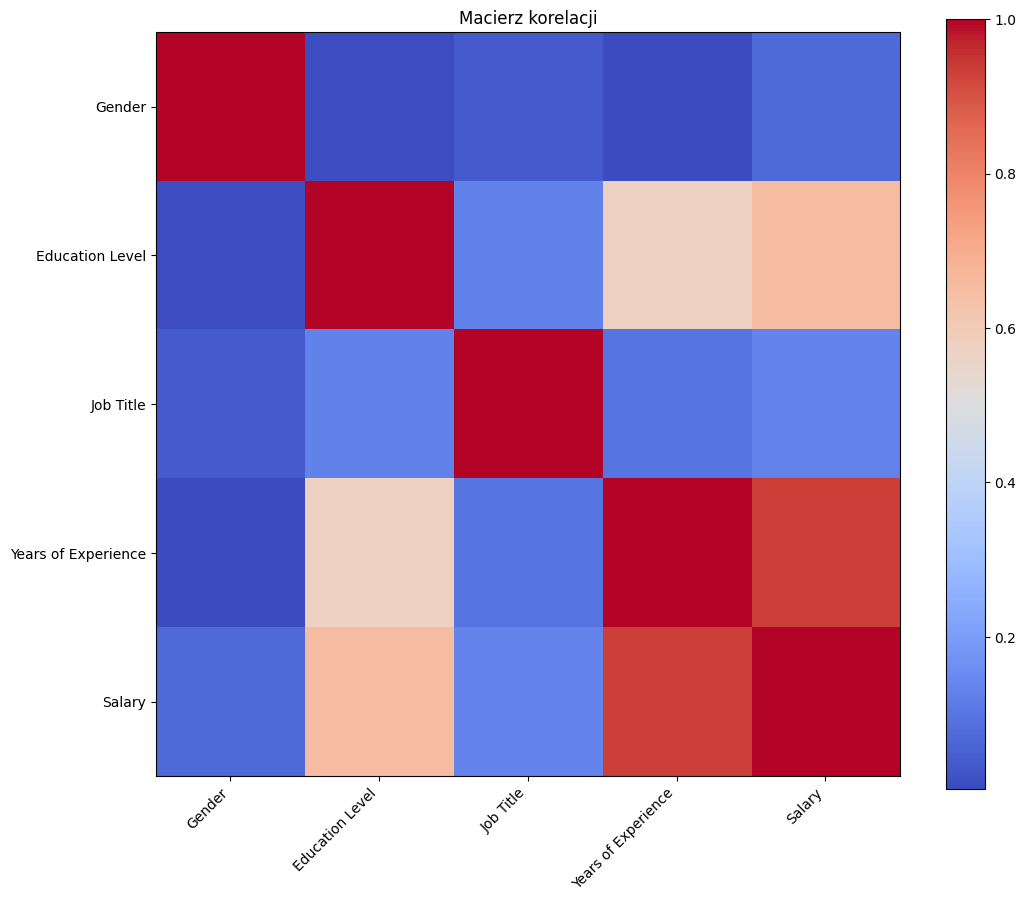

In [29]:
# Usuń kolumnę 'Age'
df_2 = df.drop('Age', axis=1)

# Podziel zbiór danych na testowy i treningowy w stosunku 30/70
X = df_2.drop('Salary', axis=1)  # Wszystkie kolumny oprócz 'Salary' to zmienne X
y = df_2['Salary']  # Kolumna 'Salary' to zmienna y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Skalowanie danych
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Stwórz model regresji liniowej z parametrami domyślnymi
model = LinearRegression()

# Dopasuj model do danych treningowych
model.fit(X_train, y_train)

# Dokonaj predykcji na danych testowych
y_pred = model.predict(X_test)

# Wyświetl współczynniki modelu
print("Współczynniki modelu:", model.coef_)
print("Wyraz wolny:", model.intercept_)

# Oblicz metryki oceny modelu
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)
print("EVS:", evs)

correlation_matrix = df_2.corr()
print("Macierz korelacji:")
print(correlation_matrix)

# Wizualizacja korelacji (heatmap)
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(df_2.columns)), df_2.columns, rotation=45, ha='right')
plt.yticks(range(len(df_2.columns)), df_2.columns)
plt.title('Macierz korelacji')
plt.show()


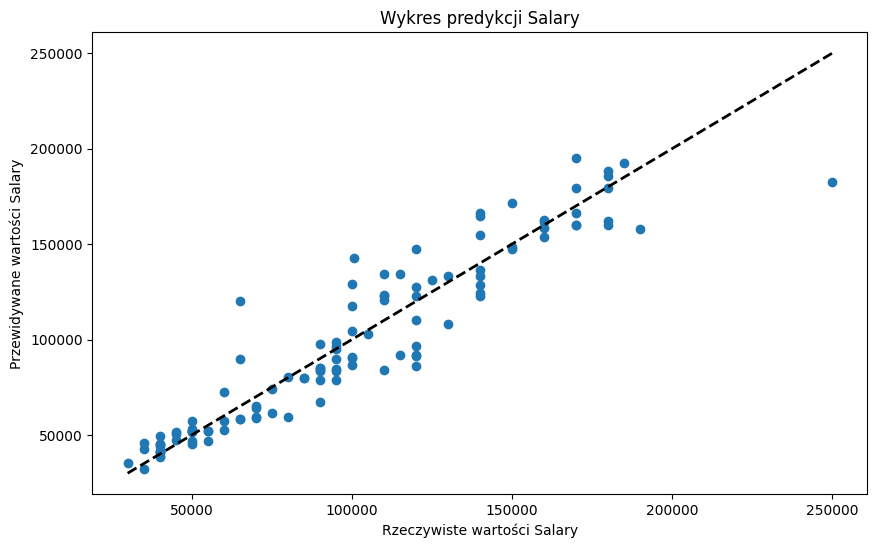

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Rzeczywiste wartości Salary')
plt.ylabel('Przewidywane wartości Salary')
plt.title('Wykres predykcji Salary')
plt.show()


Zbuduj model regresji odpornej i przetestuj jego predykcje

In [37]:
# Zbuduj model regresji odpornej (np. Ridge lub Lasso) i przetestuj jego predykcje
# Przykład użycia Ridge:
model_ridge = Ridge(alpha=1.0)  # alpha to parametr regularyzacji
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)

# Oblicz metryki oceny modelu Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
evs_ridge = explained_variance_score(y_test, y_pred_ridge)

print("MSE (Ridge):", mse_ridge)
print("MAE (Ridge):", mae_ridge)
print("R^2 (Ridge):", r2_ridge)
print("EVS (Ridge):", evs_ridge)

# Przykład użycia Lasso:
model_lasso = Lasso(alpha=1.0)  # alpha to parametr regularyzacji
model_lasso.fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_test)

# Oblicz metryki oceny modelu Lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
evs_lasso = explained_variance_score(y_test, y_pred_lasso)

print("MSE (Lasso):", mse_lasso)
print("MAE (Lasso):", mae_lasso)
print("R^2 (Lasso):", r2_lasso)
print("EVS (Lasso):", evs_lasso)

MSE (Ridge): 247021827.6139738
MAE (Ridge): 11039.090337370395
R^2 (Ridge): 0.8841760657360177
EVS (Ridge): 0.8847073508232586
MSE (Lasso): 246721550.1659848
MAE (Lasso): 11041.60162043011
R^2 (Lasso): 0.8843168602388063
EVS (Lasso): 0.8848686942437807


Wykreś przewidziane i faktyczne wartości obu modeli (przykład w dokumentacji: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_regressor.html#sphx-glr-auto-examples-ensemble-plot-voting-regressor-py)

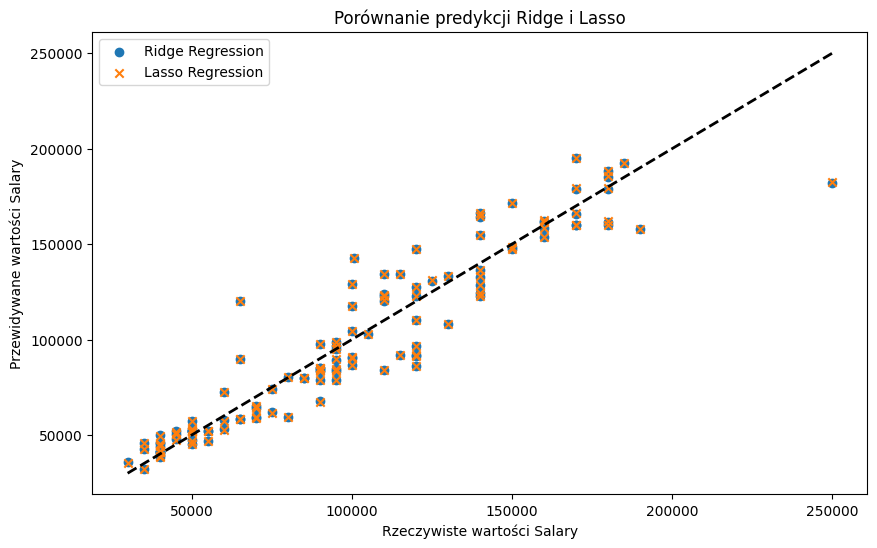

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, label='Ridge Regression', marker='o')
plt.scatter(y_test, y_pred_lasso, label='Lasso Regression', marker='x')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Rzeczywiste wartości Salary')
plt.ylabel('Przewidywane wartości Salary')
plt.title('Porównanie predykcji Ridge i Lasso')
plt.legend()
plt.show()


Zmodyfikuj kod, zeby zwizualizować wynik lepszego z modeli

In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()